# Import Libraries

In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Project imports
from config import APP_IDS, APP_NAMES, DATA_PATHS
from scraper import PlayStoreScraper
from preprocessing import ReviewPreprocessor

# Create output directories if they don't exist (at project root level)
os.makedirs('../data/raw', exist_ok=True)
os.makedirs('../data/processed', exist_ok=True)

# Display settings
pd.set_option('display.max_colwidth', 100)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

print("Setup complete!")

Setup complete!


##  Configuration Overview

In [2]:
print("Target Apps for Analysis")
print("=" * 50)
for code, name in APP_NAMES.items():
    app_id = APP_IDS[code]
    print(f"\n{code}: {name}")
    print(f"   App ID: {app_id}")

Target Apps for Analysis

beU Delivery: beU Delivery
   App ID: com.xmt.beu.applite

CakeFizz: CakeFizz
   App ID: com.cakefizz.cakefizz

Kekmart: Kekmart
   App ID: com.sr.kekmart

How to Bake: How to Bake
   App ID: com.howtobake.primex


## Scraping Google Play Reviews

In [3]:
# Initialize the scraper
scraper = PlayStoreScraper()
# Scrape reviews for all banks
# This will collect 400+ reviews per bank
raw_df = scraper.scrape_all_apps()

Current Rating: 4.37
Total Ratings: 16454
Total Reviews: 98

App information saved to C:\Users\hakima\Desktop\Project\review\data\raw/app_info.csv

[2/2] Scraping reviews...


apps:   0%|          | 0/4 [00:00<?, ?it/s]


Scraping reviews for com.xmt.beu.applite...
Target: 1500 reviews (will scrape all available)
Successfully scraped 804 reviews
Collected 804 reviews for beU Delivery


apps:  25%|██▌       | 1/4 [00:03<00:11,  3.80s/it]


Scraping reviews for com.cakefizz.cakefizz...
Target: 1500 reviews (will scrape all available)
Successfully scraped 2017 reviews
Collected 2017 reviews for CakeFizz


apps:  50%|█████     | 2/4 [00:09<00:09,  4.72s/it]


Scraping reviews for com.sr.kekmart...
Target: 1500 reviews (will scrape all available)
Successfully scraped 269 reviews
Collected 269 reviews for Kekmart


apps:  75%|███████▌  | 3/4 [00:12<00:04,  4.06s/it]


Scraping reviews for com.howtobake.primex...
Target: 1500 reviews (will scrape all available)
Successfully scraped 8987 reviews
Collected 8987 reviews for How to Bake


apps: 100%|██████████| 4/4 [00:28<00:00,  7.12s/it]



Scraping Complete!

Total reviews collected: 12077
Reviews per app:
  beU Delivery: 804
  CakeFizz: 2017
  Kekmart: 269
  How to Bake: 8987

Data saved to: C:\Users\hakima\Desktop\Project\review\data\raw\reviews_raw.csv


In [4]:
# Display scraping results summary
if not raw_df.empty:
    print("\nRaw Data Summary")
    print("=" * 50)
    print(f"Total reviews collected: {len(raw_df)}")
    print(f"\nReviews per app:")
    print(raw_df['app_name'].value_counts())
    print(f"\nColumns: {list(raw_df.columns)}")


Raw Data Summary
Total reviews collected: 12077

Reviews per app:
app_name
How to Bake     8987
CakeFizz        2017
beU Delivery     804
Kekmart          269
Name: count, dtype: int64

Columns: ['review_id', 'review_text', 'rating', 'review_date', 'user_name', 'thumbs_up', 'reply_content', 'app_code', 'app_name', 'app_id', 'source']


In [5]:
# Preview raw data
raw_df.head(10)

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,app_code,app_name,app_id,source
0,d103ace5-9323-46dc-9492-08f318e8c2cb,this is deliberately the best delivery app in addis with the fastest delivery men and has one of...,5,2025-12-12 16:01:26,ZABLON MENGISTU,0,None,beU Delivery,beU Delivery,2.1.28,Google Play
1,b2eabf78-7a78-4dc4-86fa-42d7c4a22cff,The best delivery on Addis. Thank you.,5,2025-12-02 16:37:59,Samuael Ketema,0,None,beU Delivery,beU Delivery,2.1.28,Google Play
2,096da5dc-715f-4afd-8555-bf3326bd7d8a,"Extremely disappointed with BEU. Ordered food worth 2180 birr, waited two hours, and delivery wa...",1,2025-11-28 12:34:07,Eyoel Tesfaye,0,None,beU Delivery,beU Delivery,None,Google Play
3,e097743b-06d2-4723-a3a2-39934d82da41,Your app has extremely poor state management and highly unreliable location detection. These are...,1,2025-11-23 21:12:48,Dawit Derebie,2,None,beU Delivery,beU Delivery,2.1.28,Google Play
4,e18d2c80-64d5-446c-bb32-7d405f086318,"Very glitchey, and sometimes unresponsive on Android 16, especially the Delivery Location pickin...",1,2025-11-20 16:22:30,Tinsae Demmelash,1,None,beU Delivery,beU Delivery,2.1.28,Google Play
5,4fe2c8f8-8f9f-4a33-8a89-f459b90bc4e5,l advice you to download this app this is the best app in ethiopia,5,2025-11-16 17:10:09,Atir Jemal,0,None,beU Delivery,beU Delivery,2.1.28,Google Play
6,2c8b7258-518e-4f14-9765-3125ac33afb7,The app did not even allowe toake an account saying service is not avilable. I guess it only wor...,1,2025-11-14 17:37:29,Ze'micahel's,0,None,beU Delivery,beU Delivery,None,Google Play
7,6ac02de5-3ec4-4aff-aad0-44d277152d7d,"not working well at times of meals, like lunch or dinner time.. says ""the time or your location ...",3,2025-11-09 18:49:49,Wongel Petros,0,None,beU Delivery,beU Delivery,2.1.28,Google Play
8,56669afa-1dd0-4bc1-b3c0-118501bb9b51,tleyalachu enata tmut andegha,1,2025-11-09 15:32:15,Bad Gays,0,None,beU Delivery,beU Delivery,None,Google Play
9,891b57eb-7b74-4a79-b026-6faa7f9224e3,litrally the fastest delivery app,5,2025-11-08 17:00:39,Africa Haile,0,None,beU Delivery,beU Delivery,None,Google Play


In [6]:
# Initialize and run preprocessor
preprocessor = ReviewPreprocessor()
success = preprocessor.process()

if success:
    processed_df = preprocessor.df
    print(f"\nProcessed dataset shape: {processed_df.shape}")
else:
    print("Preprocessing failed!")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 12077 reviews

[1/8] Checking for missing data...

Missing values:
  reply_content: 11536 (95.52%)
  app_id: 1917 (15.87%)

[2/8] Removing duplicates...
Removed 2371 duplicate reviews

[3/8] Handling missing values...

[4/8] Normalizing dates...
Date range: 2018-01-27 to 2025-12-16

[5/8] Cleaning text...

[6/8] Filtering English reviews...
Removed 116 non-English reviews
Remaining English reviews: 9590

[7/8] Validating ratings...
All ratings are valid (1-5)

[8/8] Preparing final output...
Final dataset: 9590 reviews

Saving processed data...
Data saved to: C:\Users\hakima\Desktop\Project\review\data\processed\reviews_processed.csv

PREPROCESSING REPORT

Original records: 12077
Duplicates removed: 2371
Records with missing critical data: 0
Empty reviews removed: 0
Non-English reviews removed: 116
Invalid ratings removed: 0
Final records: 9590

Data retention rate: 79.41%
Data error rate: 20.59%
⚠ Data quality: NEEDS ATTENTION (>1

In [7]:
# Load processed data (in case running from saved file)
processed_df = pd.read_csv(DATA_PATHS['processed_reviews'])
print(f"Loaded {len(processed_df)} processed reviews")
processed_df.head()

Loaded 9590 processed reviews


,review_id,review_text,rating,review_date,review_year,review_month,app_code,app_name,user_name,thumbs_up,text_length,source
0,f65335ea-dbf3-4805-904c-c0750a7f223d,worst App,1,2025-12-16,2025,12,CakeFizz,CakeFizz,Creative OG,0,9,Google Play
1,04edd93d-3436-452f-b8ea-dfcf7990561b,they cancelled all my orders at last minute. After long time with many discussions and arguments...,1,2025-11-11,2025,11,CakeFizz,CakeFizz,Sonu Samuel,0,381,Google Play
2,01c2dcb8-224e-4f08-837d-a8f83a76125f,its an fraud app. very poor customer service. very bad...mobile number facke...there is no conta...,1,2025-10-23,2025,10,CakeFizz,CakeFizz,DILEEPKUMAR NARAYANASWAMY,2,139,Google Play
3,667124a5-737c-43fd-a046-c316f2b0d2b9,Very Bad Experience. I had ordered cake for my grand daughter to be delivered between 5PM to 8 P...,1,2025-10-19,2025,10,CakeFizz,CakeFizz,Ajay Kumar Gupta,1,240,Google Play
4,bcbf3aac-7201-4bbd-acae-46961e55ac66,"hum order kiye payment ho gya par na hi order id mila, conform order ka msg nhi aaya, refund bhi...",1,2025-10-12,2025,10,CakeFizz,CakeFizz,Rajan Alam,0,259,Google Play


# Data Quality Assessment

In [8]:
# Data quality metrics
print("Data Quality Report")
print("=" * 50)
print(f"\nTotal records: {len(processed_df)}")
print(f"Missing values: {processed_df.isnull().sum().sum()}")
print(f"Duplicate rows: {processed_df.duplicated().sum()}")

# Check if we meet the minimum requirement
min_required = 400
print(f"\nReviews per app (minimum required: {min_required}):")
app_counts = processed_df['app_name'].value_counts()
for app, count in app_counts.items():
    status = "✓" if count >= min_required else "✗"
    print(f"  {status} {app}: {count}")

total_required = 1200
total_status = "✓" if len(processed_df) >= total_required else "✗"
print(f"\n{total_status} Total reviews: {len(processed_df)} (required: {total_required})")

Data Quality Report

Total records: 9590
Missing values: 0
Duplicate rows: 0

Reviews per app (minimum required: 400):
  ✓ How to Bake: 6655
  ✓ CakeFizz: 1937
  ✓ beU Delivery: 746
  ✗ Kekmart: 252

✓ Total reviews: 9590 (required: 1200)


In [9]:
# Data types and info
print("Dataset Info")
print("=" * 50)
processed_df.info()

Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9590 entries, 0 to 9589
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     9590 non-null   object
 1   review_text   9590 non-null   object
 2   rating        9590 non-null   int64 
 3   review_date   9590 non-null   object
 4   review_year   9590 non-null   int64 
 5   review_month  9590 non-null   int64 
 6   app_code      9590 non-null   object
 7   app_name      9590 non-null   object
 8   user_name     9590 non-null   object
 9   thumbs_up     9590 non-null   int64 
 10  text_length   9590 non-null   int64 
 11  source        9590 non-null   object
dtypes: int64(5), object(7)
memory usage: 899.2+ KB


# Reviews Distribution by app

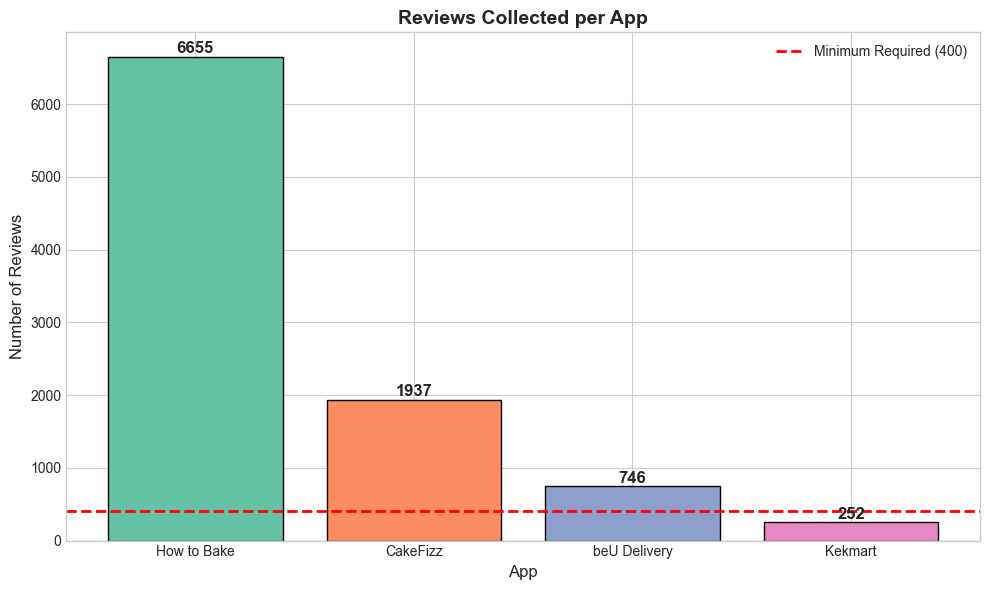

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

app_counts = processed_df['app_name'].value_counts()
colors = sns.color_palette('Set2', len(app_counts))

bars = ax.bar(app_counts.index, app_counts.values, color=colors, edgecolor='black')

# Add value labels on bars
for bar, count in zip(bars, app_counts.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
            str(count), ha='center', va='bottom', fontweight='bold', fontsize=12)

# Add minimum threshold line
ax.axhline(y=400, color='red', linestyle='--', linewidth=2, label='Minimum Required (400)')

ax.set_xlabel('App', fontsize=12)
ax.set_ylabel('Number of Reviews', fontsize=12)
ax.set_title('Reviews Collected per App', fontsize=14, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.savefig('../data/processed/reviews_per_app.png', dpi=300, bbox_inches='tight')
plt.show()

# Rating Distribution

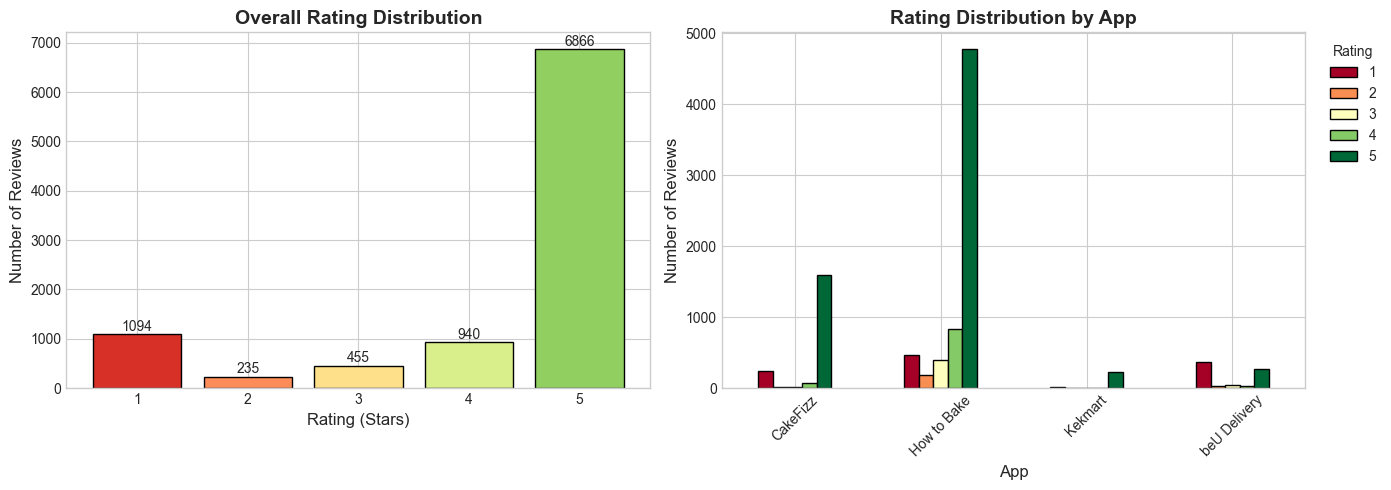

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Overall rating distribution
ax1 = axes[0]
rating_counts = processed_df['rating'].value_counts().sort_index()
colors = ['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60']  # Red to Green
bars = ax1.bar(rating_counts.index, rating_counts.values, color=colors, edgecolor='black')

for bar, count in zip(bars, rating_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             str(count), ha='center', va='bottom', fontsize=10)

ax1.set_xlabel('Rating (Stars)', fontsize=12)
ax1.set_ylabel('Number of Reviews', fontsize=12)
ax1.set_title('Overall Rating Distribution', fontsize=14, fontweight='bold')
ax1.set_xticks([1, 2, 3, 4, 5])
# Rating distribution by app
ax2 = axes[1]
rating_by_app = processed_df.groupby(['app_name', 'rating']).size().unstack(fill_value=0)
rating_by_app.plot(kind='bar', ax=ax2, colormap='RdYlGn', edgecolor='black')

ax2.set_xlabel('App', fontsize=12)
ax2.set_ylabel('Number of Reviews', fontsize=12)
ax2.set_title('Rating Distribution by App', fontsize=14, fontweight='bold')
ax2.legend(title='Rating', bbox_to_anchor=(1.02, 1), loc='upper left')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../data/processed/rating_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Average Rating by app

Average Ratings by App
              Average Rating  Std Dev  Review Count
app_name                                           
CakeFizz                4.42     1.34          1937
How to Bake             4.39     1.17          6655
Kekmart                 4.76     0.92           252
beU Delivery            2.72     1.85           746


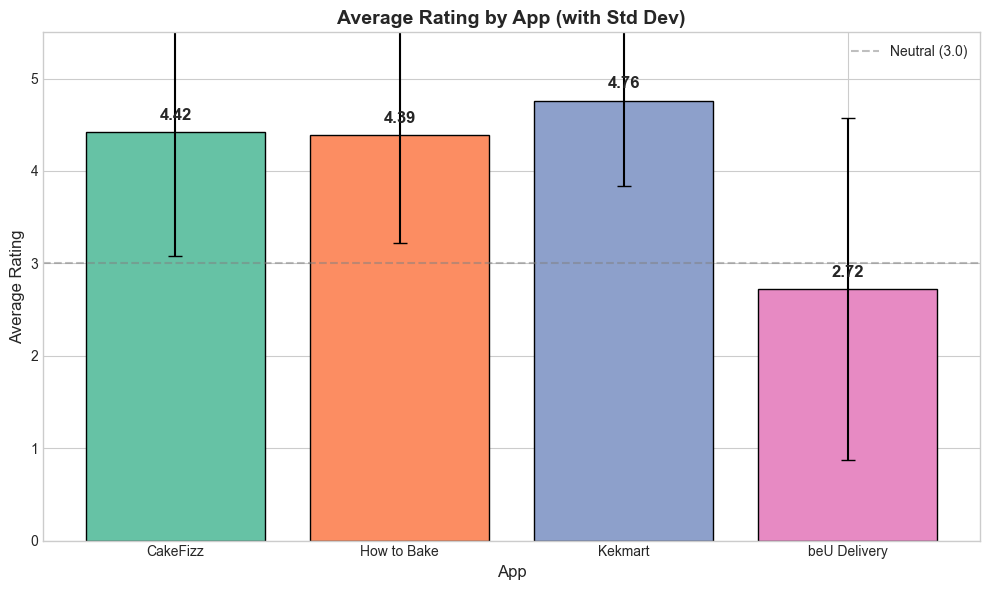

In [12]:
# Calculate average ratings
avg_ratings = processed_df.groupby('app_name')['rating'].agg(['mean', 'std', 'count'])
avg_ratings.columns = ['Average Rating', 'Std Dev', 'Review Count']
avg_ratings = avg_ratings.round(2)

print("Average Ratings by App")
print("=" * 50)
print(avg_ratings)
# Visualization
fig, ax = plt.subplots(figsize=(10, 6))

apps = avg_ratings.index
means = avg_ratings['Average Rating']
stds = avg_ratings['Std Dev']

colors = sns.color_palette('Set2', len(apps))
bars = ax.bar(apps, means, yerr=stds, capsize=5, color=colors, edgecolor='black')

for bar, mean in zip(bars, means):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
            f'{mean:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

ax.set_xlabel('App', fontsize=12)
ax.set_ylabel('Average Rating', fontsize=12)
ax.set_title('Average Rating by App (with Std Dev)', fontsize=14, fontweight='bold')
ax.set_ylim(0, 5.5)
ax.axhline(y=3, color='gray', linestyle='--', alpha=0.5, label='Neutral (3.0)')
ax.legend()

plt.tight_layout()
plt.savefig('../data/processed/average_rating_by_bank.png', dpi=300, bbox_inches='tight')
plt.show()

# Review Text Length Analysis

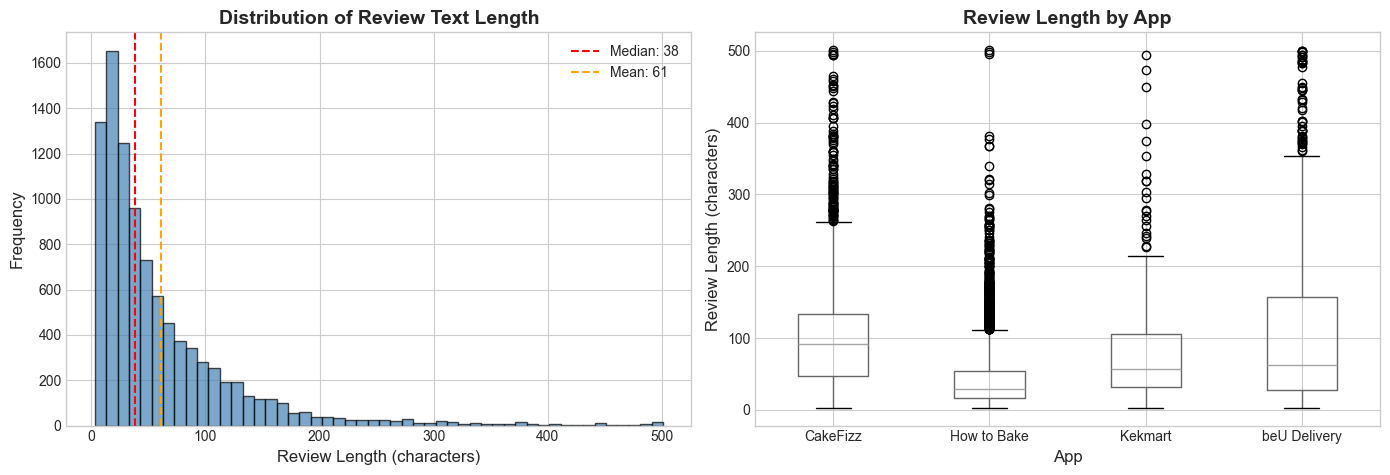

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Text length distribution
ax1 = axes[0]
processed_df['text_length'].hist(bins=50, ax=ax1, color='steelblue', edgecolor='black', alpha=0.7)
ax1.axvline(processed_df['text_length'].median(), color='red', linestyle='--', 
            label=f'Median: {processed_df["text_length"].median():.0f}')
ax1.axvline(processed_df['text_length'].mean(), color='orange', linestyle='--',
            label=f'Mean: {processed_df["text_length"].mean():.0f}')
ax1.set_xlabel('Review Length (characters)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Distribution of Review Text Length', fontsize=14, fontweight='bold')
ax1.legend()

# Text length by app (boxplot)
ax2 = axes[1]
processed_df.boxplot(column='text_length', by='app_name', ax=ax2)
ax2.set_xlabel('App', fontsize=12)
ax2.set_ylabel('Review Length (characters)', fontsize=12)
ax2.set_title('Review Length by App', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.savefig('../data/processed/text_length_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Reviews Over Time

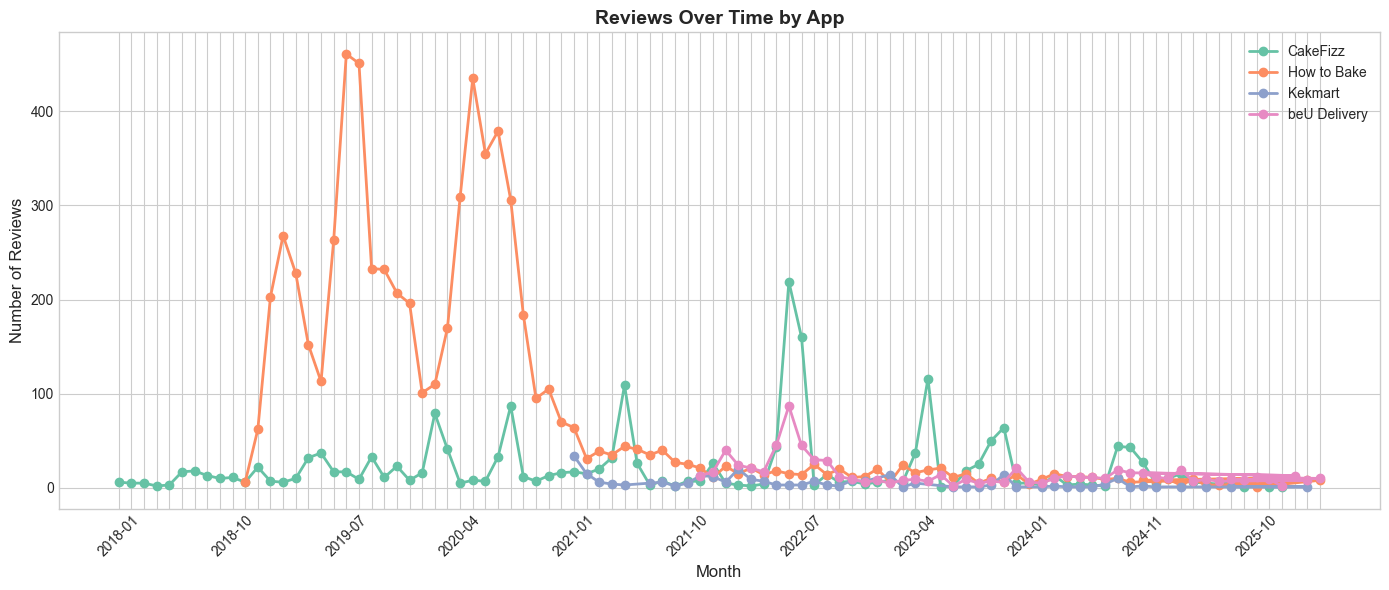

In [14]:
# Convert review_date to datetime if needed
processed_df['review_date'] = pd.to_datetime(processed_df['review_date'])

# Reviews over time (monthly)
processed_df['year_month'] = processed_df['review_date'].dt.to_period('M')

fig, ax = plt.subplots(figsize=(14, 6))

for app in processed_df['app_name'].unique():
    app_data = processed_df[processed_df['app_name'] == app]
    monthly_counts = app_data.groupby('year_month').size()
    ax.plot(monthly_counts.index.astype(str), monthly_counts.values, marker='o', label=app, linewidth=2)

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Number of Reviews', fontsize=12)
ax.set_title('Reviews Over Time by App', fontsize=14, fontweight='bold')
ax.legend()
ax.tick_params(axis='x', rotation=45)

# Show only every nth label to avoid crowding
n = max(1, len(ax.get_xticklabels()) // 10)
for i, label in enumerate(ax.get_xticklabels()):
    if i % n != 0:
        label.set_visible(False)
        plt.tight_layout()
plt.savefig('../data/processed/reviews_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

# Sample Reviews

In [15]:
# Display sample reviews for each app
for app in processed_df['app_name'].unique():
    print(f"\n{'='*60}")
    print(f"{app}")
    print('='*60)
    app_df = processed_df[processed_df['app_name'] == app]
    # Show one positive and one negative review
    positive = app_df[app_df['rating'] >= 4].head(1)
    negative = app_df[app_df['rating'] <= 2].head(1)
    if not positive.empty:
        print(f"\n[Positive Review - {positive['rating'].values[0]} stars]")
        print(f"\"{positive['review_text'].values[0][:300]}...\"")
    if not negative.empty:
        print(f"\n[Negative Review - {negative['rating'].values[0]} stars]")
        print(f"\"{negative['review_text'].values[0][:300]}...\"")


CakeFizz

[Positive Review - 5 stars]
"I ordered a cake and flowers to gift someone for an occassion. Good app for ordering app.customers support is really good. My experience with this app is very good, best cakes and gifts they always deliver good stuff at the time, best customer support like you don't have to call again and again. The..."

[Negative Review - 1 stars]
"worst App..."

How to Bake

[Positive Review - 5 stars]
"I just downloaded this app yesterday and I love everything about it it just makes everything easier for beginners ❤️‍🔥 but please add other pastry recipe and cake also..."

[Negative Review - 1 stars]
"This app has really been a big help THANKS!..."

Kekmart

[Positive Review - 5 stars]
"I purchased cake from this shop The cake was really very nice and tasty...."

[Negative Review - 2 stars]
"Not that much trust worthy and it's kind of glitching..."

beU Delivery

[Positive Review - 5 stars]
"this is deliberately the best delivery app in addis with the fastest d

# Data Export Summary

In [16]:
# Final summary
print(" Summary")
print("=" * 60)
print(f"\nData Collection:")
print(f"  - Source: Google Play Store")
print(f"  - Apps: {', '.join(APP_NAMES.values())}")
print(f"  - Total reviews: {len(processed_df)}")

print(f"\nData Quality:")
print(f"  - Missing values: {processed_df.isnull().sum().sum()}")
print(f"  - Duplicates: {processed_df.duplicated().sum()}")
print(f"  - Date range: {processed_df['review_date'].min()} to {processed_df['review_date'].max()}")

print(f"\nOutput Files:")
print(f"  - Raw data: {DATA_PATHS['raw_reviews']}")
print(f"  - Processed data: {DATA_PATHS['processed_reviews']}")

print(f"\nColumns in processed dataset:")
for col in processed_df.columns:
    print(f"  - {col}")

 Summary

Data Collection:
  - Source: Google Play Store
  - Apps: beU Delivery, CakeFizz, Kekmart, How to Bake
  - Total reviews: 9590

Data Quality:
  - Missing values: 0
  - Duplicates: 0
  - Date range: 2018-01-27 00:00:00 to 2025-12-16 00:00:00

Output Files:
  - Raw data: C:\Users\hakima\Desktop\Project\review\data\raw\reviews_raw.csv
  - Processed data: C:\Users\hakima\Desktop\Project\review\data\processed\reviews_processed.csv

Columns in processed dataset:
  - review_id
  - review_text
  - rating
  - review_date
  - review_year
  - review_month
  - app_code
  - app_name
  - user_name
  - thumbs_up
  - text_length
  - source
  - year_month
